# T033 · Molecular representations

**Note:** This talktorial is a part of TeachOpenCADD, a platform that aims to teach domain-specific skills and to provide pipeline templates as starting points for research projects.

Authors:

- [Gerrit Großmann](https://mosi.uni-saarland.de/people/gerrit/), 2022, Saarland University

__Talktorial T033__: This talktorial is part of the TeachOpenCADD pipeline described in the TeachOpenCADD publication (TODO), comprising of talktorials T033 to T038.

## Aim of this talktorial

In this talktorial, we conduct the groundwork for the deep learning talktorials (<span style="color:pink">add references: 034, 035, 036, 037, 038</span>).
Specifically, we learn about molecular representations and find that representing a molecule in a computer is not a trivial task. Different representations come with their specific implications and (dis-)advantages.

### Contents in Theory

* What is a molecule?
* Molecular representations
* Molecular Representations for Humans
* Computer-age molecular representations

### Contents in Practical

* Conformers
* Molecular graphs
* Fingerprints

### References

* Databases: 
  * [UniProt Protein Database](https://www.uniprot.org/)
  * [AlphaFold Protein Structure Database](https://alphafold.ebi.ac.uk/)
* Papers: 
  * [Molecular representations in AI-driven drug discovery: a review and practical guide](https://jcheminf.biomedcentral.com/articles/10.1186/s13321-020-00460-5#:~:text=Traditionally%2C%20molecules%20are%20represented%20as,of%20chemical%20structures%20in%20cheminformatics.)
  * [A Review of molecular representation in the Age of machine learning](https://wires.onlinelibrary.wiley.com/doi/full/10.1002/wcms.1603)
  * [Point-based molecular representation learning from conformers](https://openreview.net/pdf?id=pjePBJjlBby)
  * [Learning 3D Representations of Molecular Chirality with Invariance to Bond Rotations](https://openreview.net/pdf?id=hm2tNDdgaFK)
* Talktorials: 
  * [T008 - Protein data acquisition: Protein Data Bank (PDB)](https://github.com/volkamerlab/teachopencadd/blob/master/teachopencadd/talktorials/T008_query_pdb/talktorial.ipynb)
  * [T017 - Advanced NGLview usage](https://github.com/volkamerlab/teachopencadd/blob/master/teachopencadd/talktorials/T017_advanced_nglview_usage/talktorial.ipynb)
  * Deep learning talktorials T033 to T038
* [Tutorial on chirality](https://chem.libretexts.org/Bookshelves/Organic_Chemistry/Map%3A_Organic_Chemistry_(Vollhardt_and_Schore)/05._Stereoisomers/5.1%3A_Chiral__Molecules)

## Theory

### What is a molecule?

A molecule is a **group of atoms** that are connected through chemical bonds.
The number of atoms can range from only a few (e.g., in low molecular weight drugs) to several thousand (e.g., in proteins) or even millions (e.g., in DNA molecules). 

The physical force that is most relevant for the formation of molecules from atoms is the **electrostatic force**, which is the force that governs the behavior of charged particles. When atoms interact, their electrons can be repelled by the electrons of other atoms or attracted by their nucleus, leading to the formation of a **chemical bond** (here, we are mostly concerned with [covalent bonds](https://en.wikipedia.org/wiki/Covalent_bond) where electrons are shared between two atoms).

The formation of molecules gives a group of atoms a characteristic structure and behavior. The properties of a molecule emerge in a non-trivial way from (the interplay of) its constituent atoms. Molecules are the building blocks of living cells and play a key role in the function of living organisms.

In addition to the subdivision into small molecules and macromolecules, the distinction between organic and inorganic molecules is important. Organic molecules are the ones containing carbon-hydrogen or carbon-carbon bonds.
This talktorial focuses on **small** and **organic** molecules. 

<!--- 
![caffeine](https://upload.wikimedia.org/wikipedia/commons/thumb/c/cc/Caffeine_molecule_ball_from_xtal_%281%29.png/671px-Caffeine_molecule_ball_from_xtal_%281%29.png)
--->

![Caffeine Molecule](images/caffeine_molecule.png)

*Figure 1*: 
The image is a ball-and-stick representation of a caffeine molecule.
Atoms are shown in gray (carbon), white (hydrogen), red (oxygen), and blue (nitrogen).
An edge between two atoms indicates a covalent chemical bond with one (single line) or two (double line) shared atoms (triple bonds are also possible, but not present in caffeine).
The dashed 5-membered ring represents an aromatic ring system. Two electrons can move freely around in this ring and are not associated with a specific chemical bond within this ring.

### Molecular representations

From the viewpoint of physics, molecules are **complex three-dimensional objects** that are dynamic rather than static and that exhibit quantum mechanical properties. Depending on the task you want to solve, a simplified view of molecules might be helpful. 

To apply machine learning to molecules, we need to find a proper **representation**. As it turns out, there are several possibilities, all with their advantages and disadvantages. 
Choosing a representation of a molecule gives you control over the simplifications you want to make. They provide the recipe to translate a quantum-mechanical object into a mathematical description. 
But before we discuss computational representations of molecules, we first want to give a recap on pre-computer-age techniques to represent molecules.

### Molecular Representations for Humans

#### Small molecules

Without being able to represent molecules, it is also impossible to discuss them and communicate about them. We start with representations and visualizations that are intuitive **for Humans**. Later, we will also look at "**computer-age**" encodings, suitable as input for deep-learning systems. However, note that this classification is somewhat arbitrary. 

**Text-based:**

The easiest way to identify a molecule is its **trivial name**. For example, caffeine or aspirin. This is only possible for well-known molecules.

Alternatively, the **IUPAC nomenclature of organic chemistry** can be used (there is also one for inorganic chemistry, which we will skip here). The goal is that each possible organic molecule is associated with a name that is easy to understand and that unambiguously identifies the molecule. 
The clarity and consistency make this naming scheme reasonably easy to understand and use. 
However, not all molecules can be named using this scheme; for instance, some complex organic molecules, such as those that contain rings with multiple substructures.

**Example:** The caffeine molecule has the IUPAC name: *1,3,7-trimethylpurine-2,6-dione*.

**Molecular formula:**

The **molecular formula** (sometimes referred to as Hill notation) is the easiest (and most simplified) way of representing a molecule: You simply count the number of atoms of each type. The ordering (from left to right) is arguably a little bit arbitrary: Carbon atoms are listed first, hydrogen atoms next, and all other atoms follow in alphabetical order.
However, in the unlikely case that the formula does not contain carbon, all atoms (including hydrogen) are listed alphabetically. 

**Example:** For caffeine, the molecular formula is *C8H10N4O2*, indicating that there are 8 carbon (C) atoms, 10 hydrogen (H) atoms, 4 nitrogen (N) atoms, and 2 oxygen (O) atoms present.

Naturally, this does not uniquely identify a molecule. 

**Example:** Molecules with the same molecular formula but with different arrangements in space are called [isomers](https://chem.libretexts.org/Courses/University_of_Kentucky/UK%3A_CHE_103_-_Chemistry_for_Allied_Health_(Soult)/Chapters/Chapter_5%3A_Properties_of_Compounds/5.1%3A_Isomers).
One examples are [n-butane](https://www.wolframalpha.com/input?i=butane) and [isobutane](https://www.wolframalpha.com/input?i=isobutane). Both have the molecular formula C4H10. 
The atoms in butane are arranged in a straight chain, while the atoms in isobutane are arranged in a branch structure.
To be more precise, here, we are dealing with a *structural* or *constitutional* isomer because the chemical bonds are different. 
Molecules that have the same chemical bonds (or refer to the same molecular graph) but still differ in their spatial arrangement are called spatial (or stereo-)isomers. 

![N-butaneAndIsobutane](images/butane_and_isobutane.png)

*Figure 2*: 
N-butane and isobutane.

**Visualizations of small molecules:**

Visualizations are the easiest way to get a first impression of a molecule.
In the first example, we have already seen a visualization of the caffeine molecule. These types of visualizations are referred to as **Ball and Stick** models.
The color scheme follows the [CPK coloring](https://en.wikipedia.org/wiki/CPK_coloring).
They are easy to understand but difficult to draw.

![CPK coloring](images/cpk.png)

*Figure 3*: 
CPK coloring from Wikipedia.


2D visualizations are easy to draw and come in many different flavors.
For instance, the **Lewis structure** contains no 3D information (excess electrons that form lone pairs are sometimes shown as dots, we skip this part here).

Similarly, the **Skeletal formula** (or line-angle formula) removes hydrogen atoms that are next to carbon atoms and draws carbon atoms only implicitly as bends and ends. 

For comparison, here are the three visualizations of the ethanol molecule (from [WP](https://en.wikipedia.org/wiki/Skeletal_formula)).

<!---
![SimpleMoleculeBallStick](https://upload.wikimedia.org/wikipedia/commons/thumb/c/ca/Ethanol-CRC-MW-trans-3D-balls.png/120px-Ethanol-CRC-MW-trans-3D-balls.png)
![SimpleMoleculeLewis](https://upload.wikimedia.org/wikipedia/commons/thumb/e/e8/Ethanol-structure.svg/150px-Ethanol-structure.svg.png)
![SimpleMoleculeLineAngle](https://upload.wikimedia.org/wikipedia/commons/thumb/8/82/Ethanol-2D-skeletal.svg/120px-Ethanol-2D-skeletal.svg.png)
--->

![Ethanol visualization](images/ethanol.png)

*Figure 4*: 
Different visualizations of ethanol.


A special feature of this is the **Natta Projection** which provides basic (but not in every case complete) information about the relative positions of the atoms in 3D. For instance, consider the kinase inhibitor from the [RDKit Cookbook](https://www.rdkit.org/docs/Cookbook.html):

![Kinase Inhibitor](images/kinase_inhibitor.png)

*Figure 5*: 
Natta projection of a kinase inhibitor.

Here, 
*   Solid wedges indicate a bond that points out of the plane;
*   Dashed wedges indicate a bond that points into the plane (away from the observer)

You can find the corresponding ball-and-stick plot [here](https://molview.org/?q=C1CC2=C3C(=CC=C2)C(=CN3C1)[C@H]4[C@@H](C(=O)NC4=O)C5=CNC6=CC=CC=C65).



#### Large molecules - proteins

**Representing proteins:**

Proteins are large molecules that are composed of building blocks called amino acids. There exist 20 different natural amino acids. A protein is made up of one or more chains of amino acids. Each chain can be described as a string of characters. Therefore, we identify each of the amino acids with a [single letter](https://en.wikipedia.org/wiki/Amino_acid#Table_of_standard_amino_acid_abbreviations_and_properties).

The [Pro-thyrotropin-releasing hormone](https://www.uniprot.org/uniprotkb/P20396/entry#sequences) protein is one of the smallest proteins present in the
human body. It consists of only 242 amino acids:


```
MPGPWLLLALALTLNLTGVPGGRAQPEAAQQEAVTAAEHPGLDDFLRQVERLLFLRENIQ
RLQGDQGEHSASQIFQSDWLSKRQHPGKREEEEEEGVEEEEEEEGGAVGPHKRQHPGRRE
DEASWSVDVTQHKRQHPGRRSPWLAYAVPKRQHPGRRLADPKAQRSWEEEEEEEEREEDL
MPEKRQHPGKRALGGPCGPQGAYGQAGLLLGLLDDLSRSQGAEEKRQHPGRRAAWVREPL
EE
```

However, the amino acid sequence does not contain 3D information, which is important for the function. 
You can predict it using tools like Alphafold or simply look it up in the [Alphafold database](https://alphafold.ebi.ac.uk/entry/P20396).  


**Visualizations of proteins:**

We focus here on small molecules but still want to point out that large molecules are typically visualized differently, most commonly by a [Ribbon diagram](https://en.wikipedia.org/wiki/Ribbon_diagram).
The idea is to group common motifs and represent them, for instance, with curls (alpha-Helices) and arrows (beta-strands) connected by loops.

<!---
![TubbyProtein](https://upload.wikimedia.org/wikipedia/commons/f/ff/Tubby-1c8z-pymol.png)
--->
![TubbyProtein](images/ribbon_diagram_tubby.png)

*Figure 6*: 
Ribbon diagram of the [tubby protein](https://en.wikipedia.org/wiki/Tubby_protein).

[T008 · Protein data acquisition: Protein Data Bank (PDB)](https://projects.volkamerlab.org/teachopencadd/talktorials/T008_query_pdb.html) explains how to find proteins in the Protein Data Bank and process them.

### Computer-age molecular representations

When we want to communicate or store a molecular description, we better make sure there is little ambiguity left.
In machine learning, it is still an open research question when to use which representation. **Text**-based (or **linear**) and **graph**-based representations are becoming both very widely used. Moreover, **fingerprint**-based methods are sometimes a viable alternative, especially for traditional machine learning methods. 

**Text-based representations:**

Text-based representations use a sequence of characters to specify a molecule. This is possible for practically all (small) molecules relevant in practice. Here, we discuss SMILES, InChI, and SELFIES. For a deeper dive, we refer the reader to the SMILES talktorial [T035 · SMILES based property prediction](https://github.com/volkamerlab/teachopencadd/tree/master/teachopencadd/talktorials)

**SMILES** (Simplified Molecular Input Line Entry Specification) is the most widely used text-based representation and can be handled by all common frameworks. When we specify a molecule in RDKit, we often use SMILES notation (more on this in the practical part): 

`mol = Chem.MolFromSmiles("CN1C=NC2=C1C(=O)N(C(=O)N2C)C") `

SMILES uses a combination of letters, numbers, and symbols to represent the atoms and bonds in a molecule. The letters identify the elements, the symbols specify the connectivity/branching structure.

SMILES can also represent the [chirality](https://en.wikipedia.org/wiki/Chirality_(chemistry)) of a molecule. This is possible by specifying the relative angle of a bond for an atom. We will see an example in the practical part.

The main problem with SMILES for molecule representation is that two (or more) different SMILES strings might refer to the same molecule. Researchers try to circumvent this by resorting to a **canonical SMILES** notation. However, the canonicalization depends on the canonicalization algorithms and is therefore not standardized. 

In the other direction, a single SMILES string typically identifies no more than one molecule. However, when stereochemistry information is not given in the SMILES string, it leaves room for ambiguity (in some cases, it might not even be possible to remove all ambiguity for different molecular configurations). 


**InChI** (International Chemical Identifier) is a more modern and also widely-used alternative to SMILES. The key advantage is that it exhibits less chemical ambiguity and that a standard canonical exists. 
The downside is that it is difficult for humans to read.



**SELFIES** (SELF-referencing embedded string) was introduced in 2020, primarily for machine learning purposes. The advantage is that "every combination of symbols in the Selfies alphabet maps to a chemically valid graph" ([Source](https://www.sciencedirect.com/science/article/pii/S2666389922002069)). This is great for generative tasks where you want to generate molecules because it is impossible to generate invalid molecules.



To **summarize**, we find that different methods to encode molecules as strings exist. Currently, SMILES is the most widely adopted method and tools support it well, so it will probably be a good starting point. 

---

**Molecular graphs:**

Representing molecules as graphs allows for a very intuitive and comprehensive representation of a molecule's structure. In a graph-based representation, atoms are represented as (labeled) nodes, and bonds are represented as (labeled) edges.

One possibility to specify a graph is with an adjacency matrix $A$.
For undirected graphs (which is the case for molecules), the adjacency matrix is symmetric. An entry $a_{ij}$ indicates the presence ($a_{ij} = 1$) or absence ($a_{ij} = 0$) of an edge.

One key property of graphs is that they rely on **node ordering**.
The following two matrices identify identical graphs, except for the node ordering. We call these graphs **isomorphic**.


The fact that we need to pick a node ordering to represent a molecule as a graph means that many graphs represent the same molecule. 
This problem can be circumvented by restricting ourselves to so-called **permutation invariant functions**, as we will learn in the next section.

![TwoIsomorphicGraphs](images/graph1_graph2.png)

*Figure 7*: 
Two isomorphic graphs with different node ordering.

**Permutation invariance:** Assume you build a machine learning model that takes as input molecular graphs and outputs some prediction. It would be desirable that your model guarantees that isomorphic graphs (like *Graph 1* and *Graph 2*) generate the same output.
We call neural networks (or functions in general) that have these guarantees (node-)permutation invariant (or equivariant for node-level outputs).
However, there is a trade-off. Functions that are permutation invariant are typically not universal. That is, they are not able to tell all graphs that are non-isomorphic apart. If both were given, permutation invariance and the ability to produce a different output for all non-isomorphic graphs, our neural network would solve the graph isomorphism problem (which is computationally extremely difficult). 



TODO: link to talktorial (<span style="color:pink">resolve this</span>)

**Representational power:** Another problem is that graphs do not contain 3D information. 
Specifically, different [isomers](https://en.wikipedia.org/wiki/Isomer) can correspond to the same molecular graph but differ in the relative 3D positions of the atoms. These are called spatial isomers. 
One can circumvent this (to some degree) by adding 3D information to the node features. This is somewhat ad-hoc and not well-principled. 
It is also unclear in which cases this is necessary to improve the performance of a predictive model. 
In the practical part, we will visualize [2-butanol](https://en.wikipedia.org/wiki/2-Butanol) that admits two mirror images (called *enantiomer*) with the same graph but with different geometry. 

![Butanol_Enantiomer](images/butanol_2enantiomer.png)

*Figure 8*: 
The two enantiomers of 2-butanol (source: [WP](https://en.wikipedia.org/wiki/2-Butanol)).
---



**Point clouds:**

We have already established that molecules are three-dimensional objects. So why not directly use a computational representation that captures the 3D information? The most straightforward way to do this is to annotate the nodes/atoms in a molecular graph with Euclidean 3D coordinates $(x,y,z)$.  

The spatial arrangement of atoms is called **molecular configuration**.

Instead of equipping a graph with 3D coordinates, one can also disregard the information on chemical bonds as [this paper](https://openreview.net/pdf?id=pjePBJjlBby) claims:
> The covalent bonds between atoms do not need to be encoded explicitly because they are attributed by the overlap between the atomic orbitals, and can be inferred from the types and 3D coordinates of respective atoms. In principle, the point-based representation captures the complete structural information about the molecule, and thus serves as the adequate input for molecular representation learning.


**SE(3)-invariance:** 
When equipping the atoms of a molecule with their (absolute) 3D position, we have a similar problem as with the node ordering in the previous section.
Instead of "*Which node ordering do we choose?*" We now have to ask "*How do we position the molecule in 3D to measure the atom positions?*".
As in the node-ordering case, it is difficult (if not impossible) to give a principled answer to this question.
The solution is again to restrict ourselves to neural networks that are invariant to translations (move the whole molecule in $x$, $y$, or $z$ direction) or rotations of the molecule.
Neural networks (or functions in general) that can guarantee that the output is not affected by translations and rotations are called **SE(3)-invariant**.
One example of architecture can be found [here](https://proceedings.neurips.cc/paper/2020/file/15231a7ce4ba789d13b722cc5c955834-Paper.pdf).
One possibility to design SE(3)-invariant neural networks is to consider only the distance between all pairs of atoms instead of their absolute position. This leads not only to SE(3)-invariance but to a broader class called **E(3)-invariance**. This is because also reflections (mirror images) are guaranteed to produce the same output. For molecules, this might be suboptimal because mirror molecules can exhibit different properties (see chirality). 


**Determining configurations:** 
When you want to add 3D coordinates to atoms, you first need to find them somehow. This is not straightforward, and one can even train a machine learning model to predict this. 
One possibility is to determine the configuration experimentally.
For small molecules, [techniques](https://en.wikipedia.org/wiki/Molecular_geometry#Determination) like diffraction methods can be used.
For proteins, [other techniques](https://en.wikipedia.org/wiki/Protein_folding#Experimental_techniques_for_studying_protein_folding), like X-ray crystallography, are available.  
Alternatively, one can resort to computational methods.
For instance, the popular dataset [QM9](https://moleculenet.org/datasets-1) provides 3D coordinates of each atom that were computed using [DFT](https://en.wikipedia.org/wiki/Density_functional_theory) (an approximation to the Schrödinger equation).

**Conformers:**
However, another problem of the point cloud perspective on molecules is that there is not a single, fixed configuration for a molecule. Instead, molecules are dynamic objects.
**Molecular conformers** are different configurations that a molecule can take due to rotations around single bonds (double and triple bonds are non-rotatable). These conformations are a result of the rotational energy barriers that exist between different groups of atoms within a molecule. Conformations can change quickly and easily, e.g., in response to changes in temperature.
Note that conformers are a special type of isomers. Not all isomers can be reached by rotating single bonds. 


![Conformer](images/conformer.png)

*Figure 9*: 
Some conformers of a simple molecule ([Source paper](https://pubs.acs.org/doi/10.1021/acs.jcim.5b00654) via [Datamol tutorial](https://doc.datamol.io/stable/tutorials/Conformers.html)) on top of each other.

Each specific conformer is associated with a conformation energy.
The likelihood of a specific configuration depends on this energy (low-energy configurations are more likely than high-energy configurations). Specifically, we typically observe local minima. 
When representing a conformer, one might also store the torsion angles at rotatable bonds instead of the 3D position of each atom (as done [here](https://arxiv.org/pdf/2210.01776.pdf)).

![Energy landscape](images/energy_landscape.jpeg)

*Figure 10*: 
Energy landscape of the molecule 3-Methoxyphenol ([Source](https://chemistry-europe.onlinelibrary.wiley.com/doi/abs/10.1002/cphc.201800148)). The four local minima correspond to four stable conformations. 


Note that SE(3)-invariant machine learning models are not invariant to bond rotations. 
Specifically, they can confuse different conformations of the same molecule.
For a detailed discussion on this issue, we refer to the paper [Learning 3D Representations of Molecular Chirality with Invariance to Bond Rotations](https://openreview.net/pdf?id=hm2tNDdgaFK).



---


**Fingerprints:**

Molecular fingerprints are representations based on the molecular graph.
Typically, they are binary vectors that are relatively sparse (many 0s, very few 1s).

The most commonly used fingerprint is [ECFP4](https://chemicbook.com/2021/03/25/a-beginners-guide-for-understanding-extended-connectivity-fingerprints.html).
[MAP4](https://jcheminf.biomedcentral.com/articles/10.1186/s13321-020-00445-4) is a newer alternative. 

Fingerprints do not uniquely identify a molecule. Different molecules can have the same fingerprint.
However, the same molecule has a unique fingerprint (there is no canonicalization problem). 
It is difficult (if not practically impossible) to recover the molecular graph, given the fingerprint. 

They can be easily used for classical machine learning tasks because the architecture does not need to be invariant/equivariant to the node-ordering or geometric operations.

[T004 · Ligand-based screening: compound similarity](https://projects.volkamerlab.org/teachopencadd/talktorials/T004_compound_similarity.html) explains several molecular fingerprints.

---

**Learned representations:**

Another interesting line of research is the construction of learned molecular representation. Using a machine learning model to learn representations (from other representations)  can be useful in several ways.
For instance, the paper [Automatic Chemical Design Using a Data-Driven Continuous Representation of Molecules](https://pubs.acs.org/doi/pdf/10.1021/acscentsci.7b00572) uses a variational auto-encoder to learn a latent and continuous representation based on SMILES. 

The paper [Learning continuous and data-driven molecular descriptors by translating equivalent chemical representations](https://pubs.rsc.org/en/content/articlelanding/2019/sc/c8sc04175j) builds a latent representation based on the translation from one representation to another (e.g., SMILES into the IUPAC name).  

One can also use [contrastive learning](https://arxiv.org/pdf/2102.10056.pdf) to optimize the latent space of such learned representations. 


---


## Practical

In this section, we study how RDKit handles different molecular representations and visualizations.
We start with the caffeine molecule from *Figure 1*. We define the molecule based on a SMILES string and find the visualization in a line-angle formula. 
But first, we import all libraries:

In [1]:
import matplotlib.pyplot as plt
import networkx as nx  # for graphs
import numpy as np  # for matrices
import time

import nglview as nv  # for 3D visualizations

from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
from rdkit.Chem import AllChem, rdDistGeom
from rdkit.Chem import rdFingerprintGenerator

IPythonConsole.ipython_useSVG = True

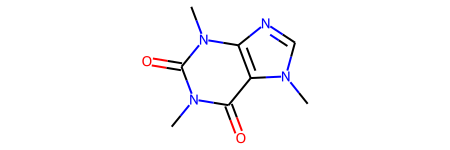

In [2]:
# Here we define a caffeine molecule using Smiles.
mol_caffeine = Chem.MolFromSmiles("CN1C=NC2=C1C(=O)N(C(=O)N2C)C")
mol_caffeine

Let us now take consider chirality.
For instance, consider [2-Butanol](https://en.wikipedia.org/wiki/2-Butanol).
The molecule has two configurations that are mirror images of each other (also called **enantiomer**). For more information and a 3D visualization, we refer to [this tutorial](https://chem.libretexts.org/Bookshelves/Organic_Chemistry/Map%3A_Organic_Chemistry_(Vollhardt_and_Schore)/05._Stereoisomers/5.1%3A_Chiral__Molecules).

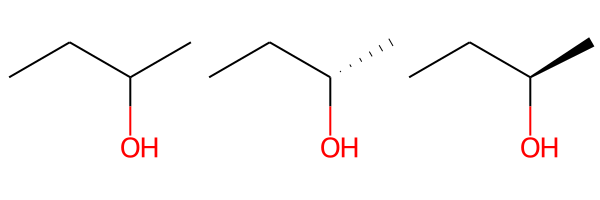

In [3]:
mol1 = Chem.MolFromSmiles("CC[CH](C)O")  # without chiral information
mol2 = Chem.MolFromSmiles("CC[C@H](C)O")  # enantiomer 1
mol3 = Chem.MolFromSmiles("CC[C@@H](C)O")  # enantiomer 2

Draw.MolsToGridImage([mol1, mol2, mol3], molsPerRow=3, subImgSize=(200, 200))

NGLViewer allows us to see a ball-and-stick visualization (example taken from [this](http://nglviewer.org/nglview/release/v0.6.1/api.html) tutorial, we also refer the reader to [Talktorial 009](https://github.com/volkamerlab/teachopencadd/blob/gg-033-molecular_representations/teachopencadd/talktorials/T009_compound_ensemble_pharmacophores/talktorial.ipynb)).

In [4]:
m = Chem.AddHs(
    Chem.MolFromSmiles("CC[C@@H](C)O")
)  # replace with 'CC[C@H](C)O' for other enantiomer
AllChem.EmbedMultipleConfs(m, useExpTorsionAnglePrefs=True, useBasicKnowledge=True)
view = nv.show_rdkit(m)
view

NGLWidget()

### Conformers

We can generate a set of n conformers using rdkit's improved conformer generator [ETKDGv3](https://pubs.acs.org/doi/10.1021/acs.jcim.0c00025).

We use aspirin as example molecule.

In [5]:
# generate moleucle from Smiles
aspirin = Chem.MolFromSmiles("CC(=O)OC1=CC=CC=C1C(=O)O")

Generate 200 conformers

In [6]:
# add hydrogens
aspirin_h = Chem.AddHs(aspirin)
# generate conformers
ps = rdDistGeom.ETKDGv3()
ps.randomSeed = 0xd06f00d
ps.numThreads = 10
conf_ids = rdDistGeom.EmbedMultipleConfs(aspirin_h,200,ps)
len(conf_ids)

200

In [7]:
# remove hydrogens again
aspirin_3d = Chem.RemoveHs(aspirin_h)

In [8]:
# print the x,y,z coordinates of the 4 atoms of the first conformer.
aspirin_3d.GetConformer(0).GetPositions()

array([[ 3.17177358e+00,  1.13975092e+00,  6.12050422e-01],
       [ 1.98734957e+00,  3.90834457e-01,  9.19310127e-02],
       [ 1.95434233e+00, -8.20849379e-02, -1.07284503e+00],
       [ 8.65900335e-01,  1.97098454e-01,  9.10857701e-01],
       [-2.14068548e-01, -5.02003119e-01,  3.95375173e-01],
       [-3.07586031e-01, -1.87543768e+00,  5.04952185e-01],
       [-1.40162108e+00, -2.53917464e+00, -2.25174878e-02],
       [-2.39467097e+00, -1.80935952e+00, -6.57796038e-01],
       [-2.31798424e+00, -4.42863585e-01, -7.75844847e-01],
       [-1.20389423e+00,  2.11393890e-01, -2.36134063e-01],
       [-1.08680181e+00,  1.64513299e+00, -3.38077955e-01],
       [-1.97512940e+00,  2.30934384e+00, -9.08542136e-01],
       [ 1.01675229e-03,  2.30156728e+00,  1.89444696e-01]])

In [9]:
def show_conformers(molecule, ids):
    """Generate a view of the ligand conformations.

    Parameters
    -----------
    molecule: rdkit.Chem.rdchem.Mol

    Returns
    ----------
    nglview.widget.NGLWidget
    """
    
    view = nv.NGLWidget()
    print(type(molecule))
    for i in range(0, ids):
        mb = Chem.MolToMolBlock(molecule, confId=i)
        component = view.add_component(mb, ext='sdf')
        time.sleep(0.1)
        component.clear()
        component.add_ball_and_stick(multipleBond=True)
    return view

In [10]:
view = show_conformers(aspirin_3d, 5)
view

<class 'rdkit.Chem.rdchem.Mol'>


NGLWidget()

### Molecular graphs

A common tool to work with graphs is called **networkX**. We use it to create two isomorphic graphs.

In [11]:
# create two adjacency matrices
adj_matrix_1 = np.array([[0, 0, 0, 1], [0, 0, 0, 1], [0, 0, 0, 1], [1, 1, 1, 0]])
adj_matrix_2 = np.array([[0, 1, 1, 1], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0]])
print("Matrix 1:\n", adj_matrix_1)
print("\nMatrix 2:\n", adj_matrix_2)

# convert adjacency matrices to graphs
graph_1 = nx.from_numpy_matrix(adj_matrix_1)
graph_2 = nx.from_numpy_matrix(adj_matrix_2)


Matrix 1:
 [[0 0 0 1]
 [0 0 0 1]
 [0 0 0 1]
 [1 1 1 0]]

Matrix 2:
 [[0 1 1 1]
 [1 0 0 0]
 [1 0 0 0]
 [1 0 0 0]]



And the corresponding graphs:



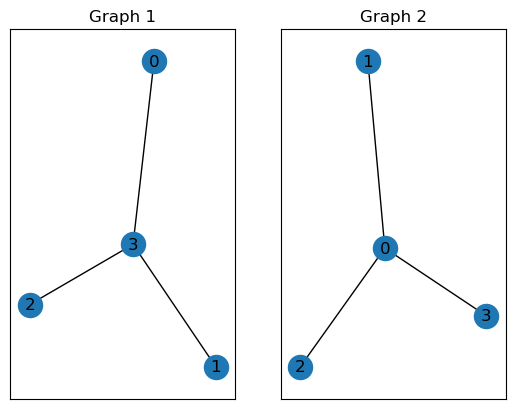

In [12]:
# draw
print("\nAnd the corresponding graphs:\n")
plt.subplot(1, 2, 1)
plt.title("Graph 1")
nx.draw_networkx(graph_1, with_labels=True)
plt.subplot(1, 2, 2)
plt.title("Graph 2")
nx.draw_networkx(graph_2, with_labels=True)


**Practical considerations:** 

Building a molecular graph requires the labeling of nodes and edges.
Common frameworks support this.
For machine learning, [PyTorch Geometric](https://pytorch-geometric.readthedocs.io/en/latest/) is the most popular framework for building permutation-invariant neural networks. 
We provide a talktorial at TODO.

Converting a SMILES string or RDKit object to a PyTorch Geometric graph is not complicated, but somewhat technical. One possible implementation is explained [here](https://www.blopig.com/blog/2022/02/how-to-turn-a-smiles-string-into-a-molecular-graph-for-pytorch-geometric/).
Similarly, one can create a networkX graph as explained [here](https://gist.github.com/fangkuoyu/dc785218e5d4d94c752e80f1aaba4fad).


As you see, molecular graph representations are not standardized and leave a lot of **design choices** to the user.
These include:

- What are the node features? Only the atom type, or also information on chirality? One can also include the information if the atom is part of a ring. 
- For the edge features: Do you only include the bond type (single, double, triple) or also the bond length? Do you use one-hot encodings or scalars?
- Do you want to include hydrogen atoms that are bound to carbon atoms, or leave them out?
- Do you want to add a master node (a dummy atom connected to all other atoms)? It might help some ML algorithms.
- Do you want to explicitly indicate some substructures in the molecular graph?


### Fingerprints

Generate circular fingerprint (`ecfp`) and print information.

In [13]:
fpg = rdFingerprintGenerator.GetMorganGenerator()
fpg.GetInfoString()

'Common arguments : countSimulation=0 fpSize=2048 bitsPerFeature=1 --- MorganArguments includeChirality=0 onlyNonzeroInvariants=0 radius=3 --- MorganEnvironmentGenerator --- MorganInvariantGenerator includeRingMembership=1 --- MorganInvariantGenerator useBondTypes=1 useChirality=0'

In [14]:
fp = fpg.GetFingerprintAsNumPy(mol_caffeine)

In [15]:
def visualize_fingerprint_info(fp):
    print("Number of elements: ", fp.size)
    print("Types of entries: ", set(list(fp)))
    print("Number of Ones: ", np.count_nonzero(fp))
    plt.vlines(
        [i for i in range(fp.size) if fp[i] > 0.5], ymin=0, ymax=300
    )  # 300 gives a nice aspect ratio
    plt.vlines(fp.size, ymin=0, ymax=0.0)  # dummy to calibrate scale
    plt.gca().set_aspect("equal")

Number of elements:  2048
Types of entries:  {0, 1}
Number of Ones:  34


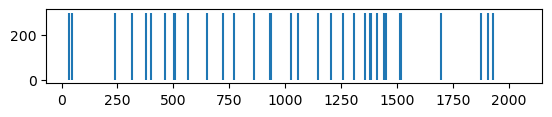

In [16]:
visualize_fingerprint_info(fp)

Try another fingerprint: Rdkit fingerprint

In [17]:
fpg2 = rdFingerprintGenerator.GetRDKitFPGenerator()
fp2 = fpg2.GetFingerprintAsNumPy(mol_caffeine)

Number of elements:  2048
Types of entries:  {0, 1}
Number of Ones:  759


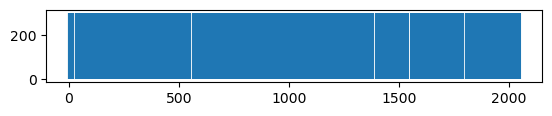

In [18]:
# The "rdkit" fingerprint is less sparse than ECFP
visualize_fingerprint_info(fp2)

## Discussion



We have discussed different methods for molecular representations:

*   A molecule is a bag/multiset of atoms (molecular formula). This representation cannot differentiate isomers. 
*   A molecule is a labeled graph (molecular graphs) or a derived representation (SMILES, fingerprints). This representation can differentiate structural isomers and in some cases some (but not all) spatial isomers. 
*   A molecule is a graph, equipped with 3D coordinates (point clouds). This *configuration* can be predicted or determined experimentally. 
*   A molecule is a manipulable 3D object, e.g., with rotational bonds. Isomers that can be reached by rotating single bonds are called conformers.

We have also learned that intermolecular forces are only explicitly represented when they lead to chemical bonds (and sometimes not even then). Other forces might be represented implicitly in the 3D configuration. 

We have not discussed methods that only consider the surface area of a molecule.

## Quiz

* Can the same molecule correspond to different molecular graphs?
* True or false: When you mirror/rotate a molecule, its properties remain the same.
* Can an ML model predict different properties, depending on which SMILES canonicalization you use as input?
* Can an ML model predict different properties, depending on which node ordering you use as input?
* True or false: Only forces between atoms that lead to chemical bonds are relevant to a molecule's properties.

<!-- 
1. Yes, due to the node ordering.
2. For rotation: true. For reflection: generally false (if the molecule is chiral)
3. Yes. Text-based ML models are not invariant to different SMILES canonicalizations.
4. If you use a graph neural network (an ML model that is invariant to node-orderings), no.
5. False (hydrogen bonding, van der Waals force)
-->
